In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from sklearn.linear_model import TweedieRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from scipy import stats
from sklearn.model_selection import KFold
import collections
import shap
# from sklearn.compose import make_column_transformer

In [97]:
# !pip install shap

In [98]:
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.simplefilter("always")
warnings.filterwarnings("ignore")

In [99]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,13500,23,46986,1.0,90,1,0,2000,3,1165
1,13750,23,72937,1.0,90,1,0,2000,3,1165
2,13950,24,41711,1.0,90,1,0,2000,3,1165
3,14950,26,48000,1.0,90,0,0,2000,3,1165
4,13750,30,38500,1.0,90,0,0,2000,3,1170


In [100]:
train, test = train_test_split(df, test_size=0.25, random_state=0)

train_train, train_validation = \
train_test_split(train, test_size=0.25, random_state=0)

In [101]:
# train['Feature 8'].unique()

In [102]:
# train.dtypes
train.info

<bound method DataFrame.info of           Y  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
1057   6500         78     176000        NaN         86          0          0   
276   13450         39      46821        0.0         97          1          0   
418    8950         55      94401        NaN         72          0          0   
269   10950         39      48945        0.0        110          0          0   
615    6250         67     149000        NaN         90          1          0   
...     ...        ...        ...        ...        ...        ...        ...   
763    9130         67      79762        NaN         86          1          0   
835    9750         67      67762        NaN        110          1          0   
1216   8500         70      85864        NaN         72          1          0   
559   13500         50      39706        NaN        110          1          0   
684    8950         68     101001        NaN        110          0          0

In [103]:
train.describe()

,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
count,1077.000000,1077.000000,1077.000000,316.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,10784.613742,55.746518,68301.094708,0.164557,101.426184,0.686165,0.054782,1563.375116,4.051996,1072.414113
std,3696.861592,18.878741,37416.226382,0.371368,14.290708,0.464266,0.227660,186.373951,0.953904,52.951610
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8500.000000,44.000000,42800.000000,0.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63792.000000,0.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,88500.000000,0.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,232940.000000,1.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


In [104]:
train.columns[train.isna().any()].tolist()

['Feature 3']

In [105]:
print(train['Feature 3'].unique())

[nan  0.  1.]


In [106]:
train['Feature 3'].value_counts()

0.0    264
1.0     52
Name: Feature 3, dtype: int64

In [107]:
print(train['Feature 3'].unique())
print(train['Feature 3'].isnull().mean())

[nan  0.  1.]
0.7065923862581244


In [108]:
X_train, X_validation, y_train, y_validation = \
train_train.drop(columns=['Y', 'Feature 3']).values,\
 train_validation.drop(columns=['Y', 'Feature 3']).values,\
 train_train['Y'].values, train_validation['Y'].values

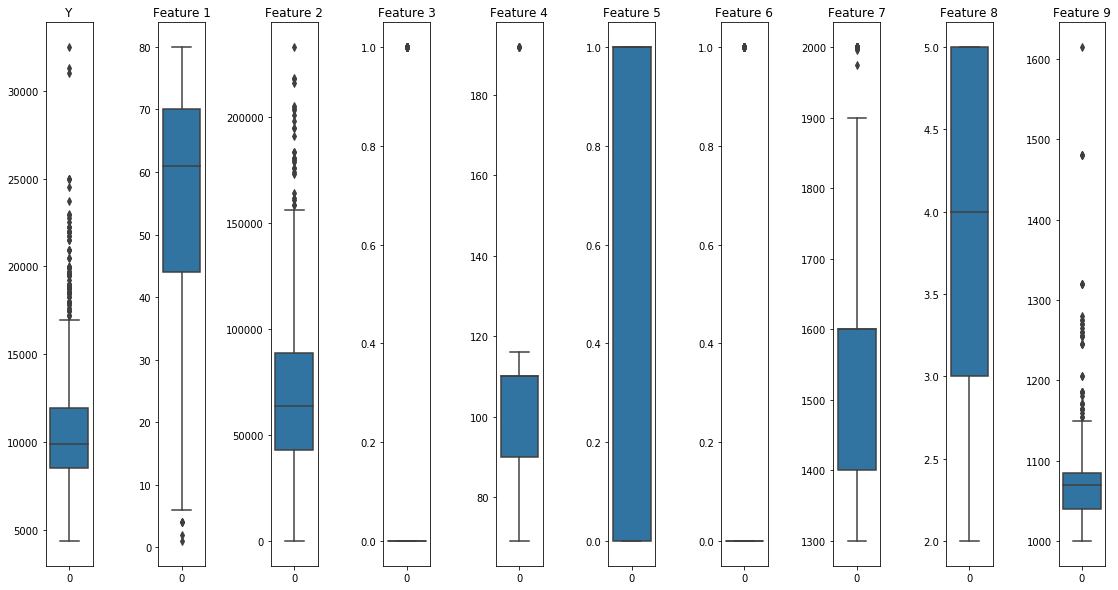

In [109]:
if True:
  number_of_columns=20
  number_of_rows = 1
  plt.figure(figsize=(number_of_columns,10*number_of_rows))
  for i, col in enumerate(train):
      ax = plt.subplot(1, number_of_columns, (i+1)*2)
      sns.boxplot(data=train[col])
      ax.title.set_text(train.columns[i])

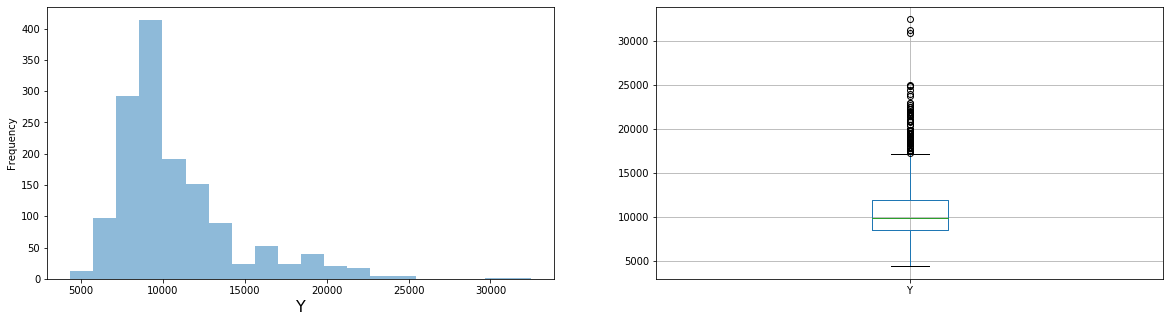

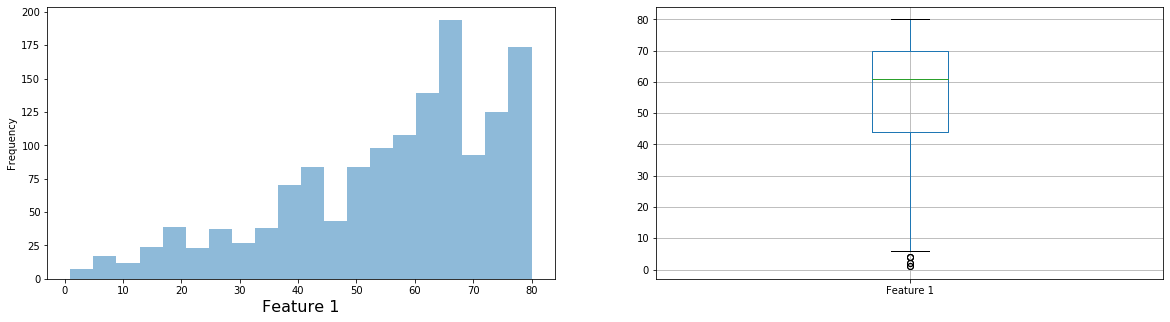

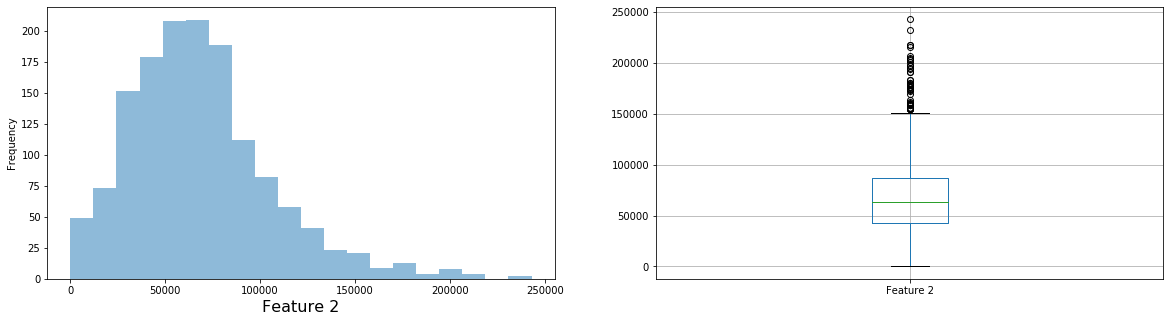

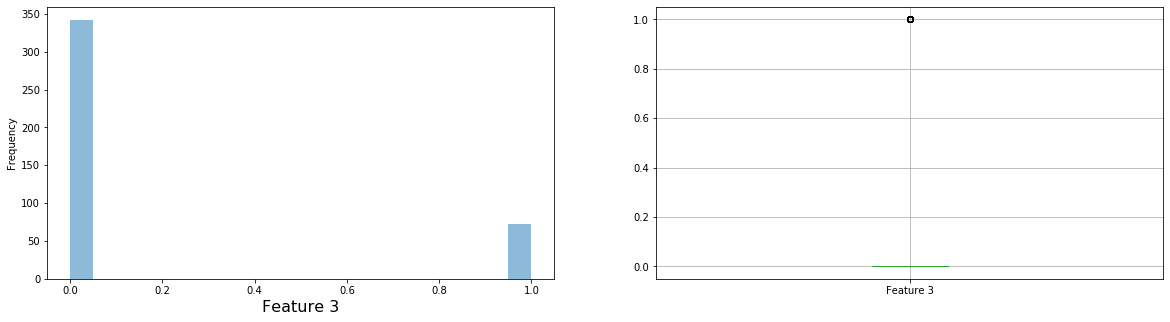

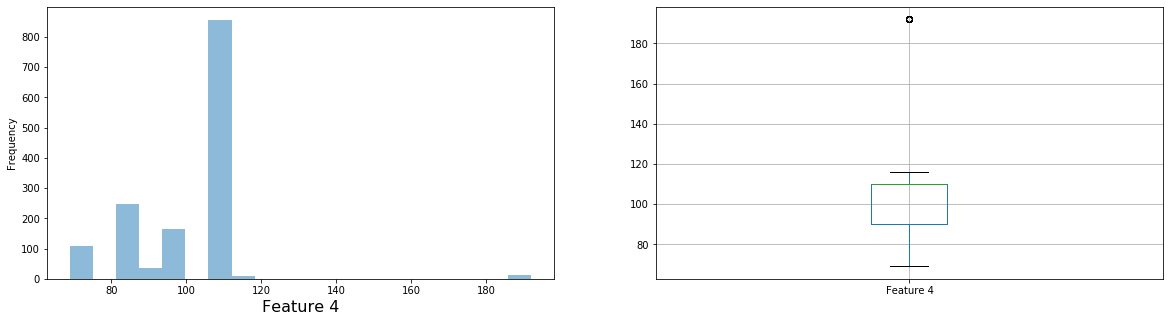

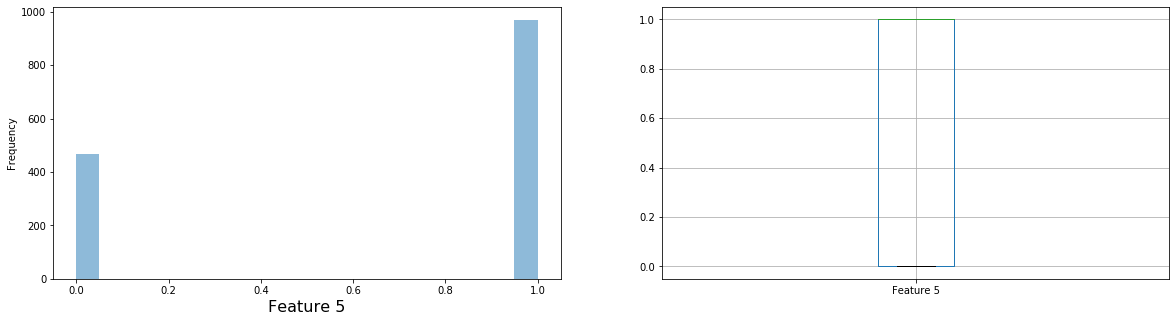

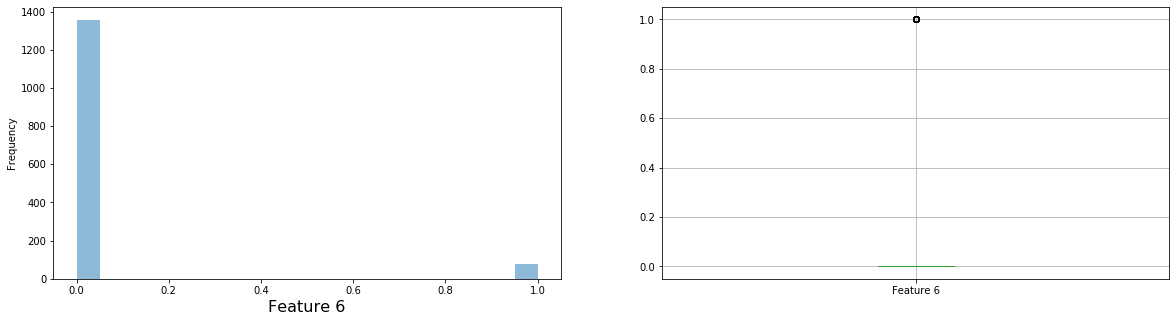

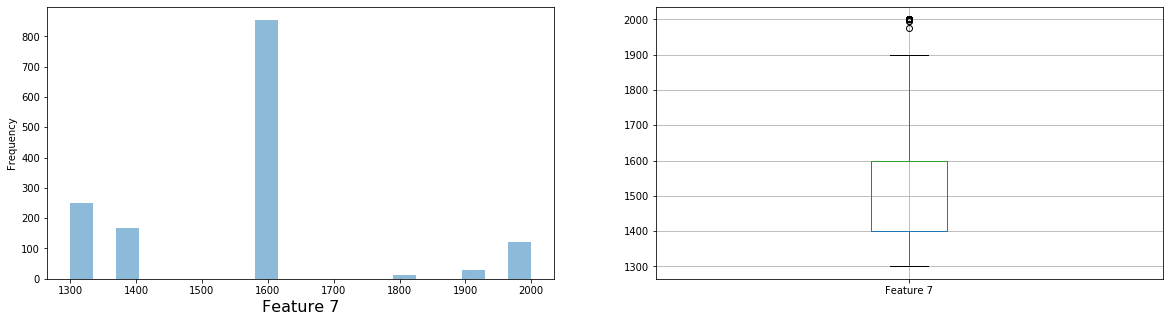

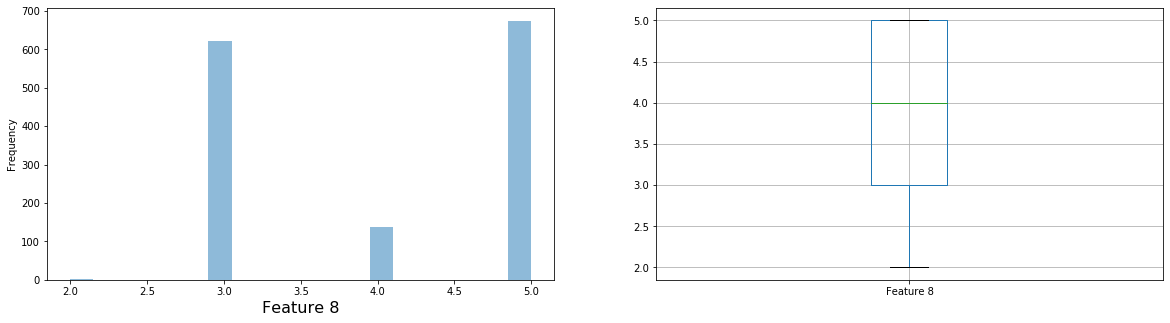

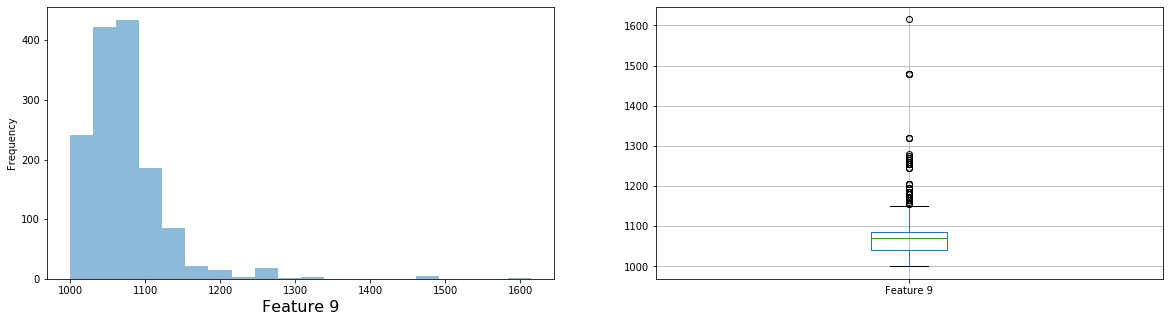

In [110]:
if True:
  for col in df:
      fig = plt.figure(figsize=(20,5))
      ax = fig.add_subplot(121)
      df[col].plot.hist(bins=20, alpha=0.5)
      plt.xlabel(col, fontsize=16)
      ax2 = fig.add_subplot(122)
      df.boxplot(column=[col])   

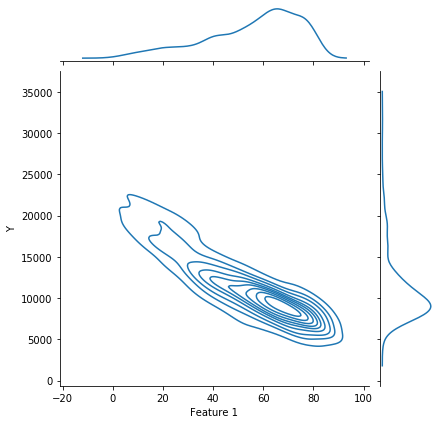

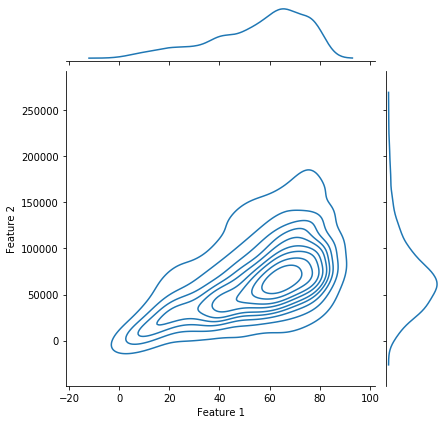

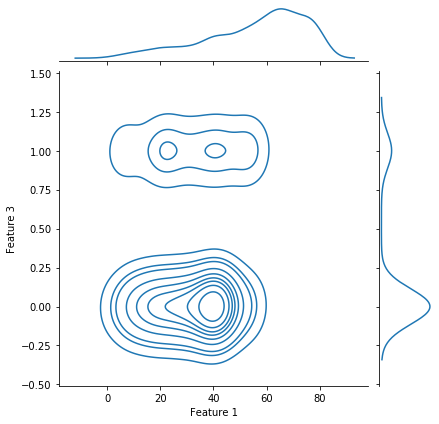

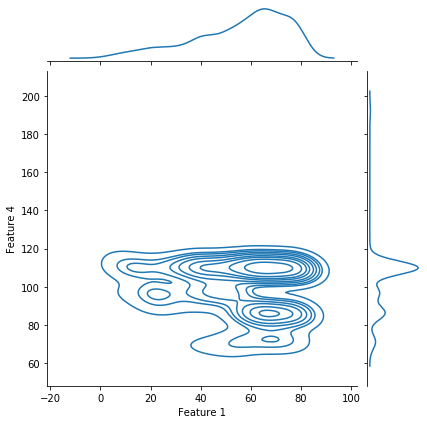

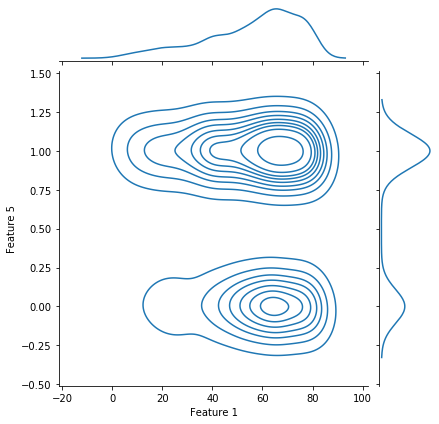

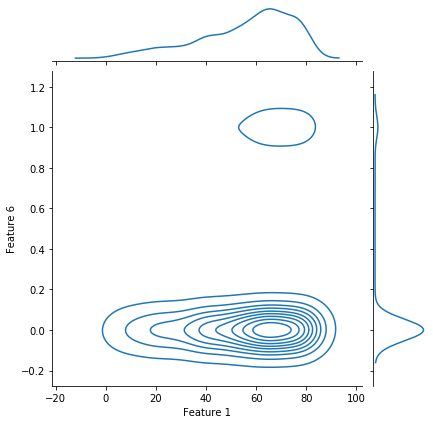

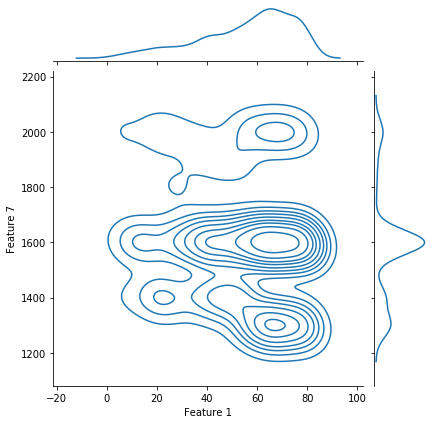

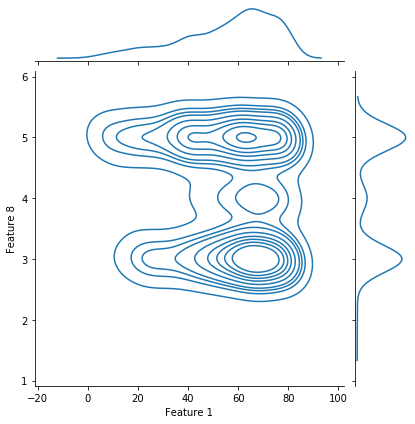

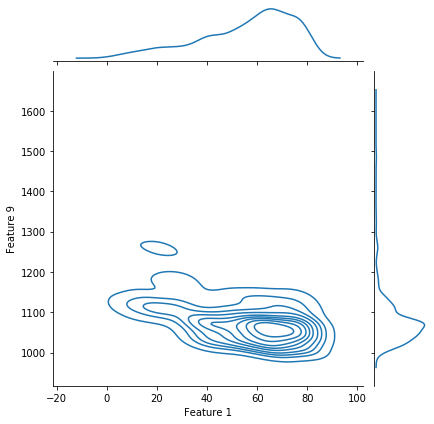

In [111]:
if True:
  col1 = 'Feature 1'
  for col2 in df.columns.drop(col1):
      p = sns.jointplot(x=col1,y=col2,data=df,kind = "kde")

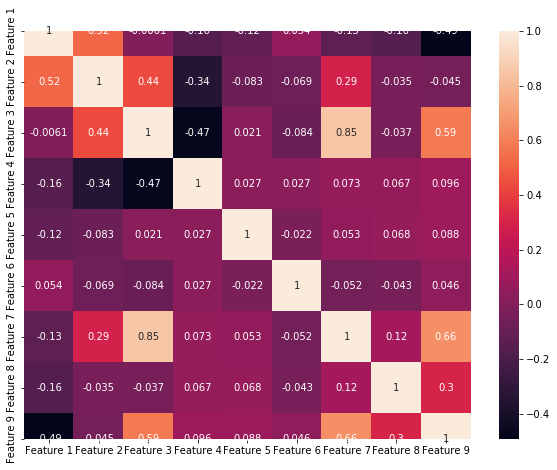

In [112]:
if True:
  corrMatrix  = train.drop(columns=['Y']).corr()
  plt.subplots(figsize=(10,7.5))
  sns.heatmap(corrMatrix, annot=True)

In [113]:
# df['Feature 3'].fillna(df['Feature 3'].mode()[0], inplace = True)
# df['Feature 3'].fillna(df['Feature 3'].mean(), inplace = True)

In [114]:
# pca = PCA()
# pca.fit(X_train)
# X_train = pca.fit_transform(scale(X_train))
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [115]:
# z_scores = stats.zscore(train.drop(columns=['Y', 'Feature 3']))
# print(train.shape)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 4).all(axis=1)
# X_new_train = train.drop(columns=['Y', 'Feature 3'])[filtered_entries]
# y_new_train = train['Y'][filtered_entries]
# X_train, X_test, y_train, y_test = X_new_train.values, test.drop(columns=['Y', 'Feature 3']).values, y_new_train.values, test['Y'].values
# print(np.shape(X_train), np.shape(y_new_train))

In [116]:
def train_and_evaluate(reg_model, X_train, X_validation,\
                       y_train, y_validation, Results, regressor_name):
    
    prediction = reg_model.predict(X_validation)
    prediction_train = reg_model.predict(X_train)
   

    Results[(regressor_name,'Validation', 'R2Score')] = r2_score(y_validation, prediction)
    Results[(regressor_name, 'Validation', 'mse')] = mean_squared_error(y_validation, prediction)
    Results[(regressor_name, 'Validation', 'rmse')] = mean_squared_error(y_validation, prediction, squared=False)
    Results[(regressor_name, 'Train', 'R2Score')] = r2_score(y_train, prediction_train)
    Results[(regressor_name, 'Train', 'mse')] = mean_squared_error(y_train, prediction_train)
    Results[(regressor_name, 'Train', 'rmse')] = mean_squared_error(y_train, prediction_train, squared=False)

    if True:
      print("On Validation/Test Set:")
      # print(reg_model.score(X_validation, y_validation))
      print("R2Score: ", Results[(regressor_name,'Validation', 'R2Score')])
      # print("mean squre error: ", Results[(regressor_name,'Validation', 'mse')] )
      print("root mean squre error: ", Results[(regressor_name,'Validation', 'rmse')] )
      
      print("On Train Set:")
      print("R2Score: ", Results[(regressor_name,'Train', 'R2Score')])
      # print("mean squre error: ", Results[(regressor_name,'Train', 'mse')])
      print("root mean squre error: ", Results[(regressor_name,'Train', 'rmse')])
      print("===========================")

    return Results


In [117]:
def train_and_evaluate_all_regressors(X_train, X_validation, y_train, y_validation):
  
  regressor_name_list = ['GradientBoostingRegressor',\
                         'xgb.XGBRegressor',\
                         'LinearRegression',\
                         'ExtraTreesRegressor',\
                         'TweedieRegressor',\
                         'KernelRidge',\
                         'ElasticNet',\
                         'PLSRegression',\
                         'LinearRegression_withPCA']
            

  regressor_dictionary = {}
  regressor_dictionary[('GradientBoostingRegressor')] = GradientBoostingRegressor()
  regressor_dictionary[('xgb.XGBRegressor')] = xgb.XGBRegressor()
  regressor_dictionary[('LinearRegression')] = LinearRegression()
  regressor_dictionary[('ExtraTreesRegressor')] = ExtraTreesRegressor(n_estimators=100, random_state=0)
  regressor_dictionary[('TweedieRegressor')] = TweedieRegressor()
  regressor_dictionary[('KernelRidge')] = KernelRidge()
  regressor_dictionary[('ElasticNet')] = ElasticNet(random_state=0)
  regressor_dictionary[('PLSRegression')] = PLSRegression(n_components=9)
  regressor_dictionary[('LinearRegression_withPCA')] = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())

  Results={}
  for regressor_name in regressor_name_list:
    print(regressor_name)
    reg = regressor_dictionary[(regressor_name)]
    reg.fit(X_train, y_train)
    Results = train_and_evaluate(reg_model=reg, X_train=X_train, X_validation=X_validation,\
                  y_train=y_train, y_validation=y_validation,\
                    Results=Results, regressor_name=regressor_name)
  return Results

In [118]:
Results = train_and_evaluate_all_regressors(X_train, X_validation, y_train, y_validation)

GradientBoostingRegressor
On Validation/Test Set:
R2Score:  0.9269246112050621
root mean squre error:  1085.4035126139368
On Train Set:
R2Score:  0.9486157261714813
root mean squre error:  810.0642764407373
xgb.XGBRegressor
On Validation/Test Set:
R2Score:  0.9192764532676627
root mean squre error:  1140.7901770226354
On Train Set:
R2Score:  0.9976829258052401
root mean squre error:  172.0181762443935
LinearRegression
On Validation/Test Set:
R2Score:  0.8961395779122614
root mean squre error:  1293.9893352481527
On Train Set:
R2Score:  0.8715294180937811
root mean squre error:  1280.8734223460726
ExtraTreesRegressor
On Validation/Test Set:
R2Score:  0.9275131928989877
root mean squre error:  1081.0235137647203
On Train Set:
R2Score:  0.9999980350895811
root mean squre error:  5.009285059065213
TweedieRegressor
On Validation/Test Set:
R2Score:  0.8692048847398439
root mean squre error:  1452.1163582875681
On Train Set:
R2Score:  0.8347236827192501
root mean squre error:  1452.8128827785

In [119]:
shap.initjs()

In [120]:
if False:
  X_train, X_validation, y_train, y_validation = \
  train_train.drop(columns=['Y', 'Feature 3']).values,\
  train_validation.drop(columns=['Y', 'Feature 3']).values,\
  train_train['Y'].values, train_validation['Y'].values
  
  reg = xgb.XGBRegressor().fit(X_train, y_train)

  Results = train_and_evaluate(reg, X_train, X_validation,\
                        y_train, y_validation, {}, "xgb")

  explainer = shap.TreeExplainer(reg)
  X_train = train_train.drop(columns=['Y', 'Feature 3'])
  shap_values = explainer.shap_values(X_train)
  shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

  X_train, X_validation, y_train, y_validation = \
  train_train.drop(columns=['Y', 'Feature 3', 'Feature 6']).values,\
  train_validation.drop(columns=['Y', 'Feature 3', 'Feature 6']).values,\
  train_train['Y'].values, train_validation['Y'].values
  
  reg = xgb.XGBRegressor().fit(X_train, y_train)

  Results = train_and_evaluate(reg, X_train, X_validation,\
                        y_train, y_validation, {}, "xgb")

In [121]:
X_train, X_test, y_train, y_test = \
    train.drop(columns=['Y', 'Feature 3']).values,\
    test.drop(columns=['Y', 'Feature 3']).values,\
    train['Y'].values, test['Y'].values


Results = train_and_evaluate_all_regressors(X_train, X_test, y_train, y_test)

GradientBoostingRegressor
On Validation/Test Set:
R2Score:  0.8804324215770207
root mean squre error:  1176.9836886492947
On Train Set:
R2Score:  0.9489275469144702
root mean squre error:  835.0737541032994
xgb.XGBRegressor
On Validation/Test Set:
R2Score:  0.8644324778340904
root mean squre error:  1253.2610904585201
On Train Set:
R2Score:  0.9955976705975016
root mean squre error:  245.17305737338495
LinearRegression
On Validation/Test Set:
R2Score:  0.8047464765712329
root mean squre error:  1504.0530932089478
On Train Set:
R2Score:  0.8796680816269067
root mean squre error:  1281.8048054289202
ExtraTreesRegressor
On Validation/Test Set:
R2Score:  0.8579429519047401
root mean squre error:  1282.906838978269
On Train Set:
R2Score:  0.9999982767626653
root mean squre error:  4.850695611029773
TweedieRegressor
On Validation/Test Set:
R2Score:  0.803119950372168
root mean squre error:  1510.3047296384536
On Train Set:
R2Score:  0.8453890871035165
root mean squre error:  1452.95293780839

In [122]:
# num_splits = 10

# Results = {}
# kf = KFold(n_splits=num_splits, random_state=0, shuffle=True)
# for train_index, test_index in kf.split(df):
#   X_train, X_test, y_train, y_test = \
#     df.drop(columns=['Y', 'Feature 3']).loc[train_index],\
#     df.drop(columns=['Y', 'Feature 3']).loc[test_index],\
#     df['Y'].loc[train_index], df['Y'].loc[test_index]

#   if Results=={}:
#     Results = train_and_evaluate_all_regressors(X_train, X_test, y_train, y_test)
#   else:
#     new_result = train_and_evaluate_all_regressors(X_train, X_test, y_train, y_test)
#     Results = dict(collections.Counter(Results) + collections.Counter(new_result))

# Results = dict(collections.Counter({key : Results[key] / num_splits for key in Results}))


In [123]:
# dictionary_items = Results.items()
# for item in dictionary_items:
#     print(item)

In [124]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from tensorflow import keras
from tensorflow.keras import layers
# import tensorflow

In [125]:
input_shape = [8]
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    # layers.Dropout(0.1),
    # layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    # layers.Dropout(0.1),
    # layers.BatchNormalization(),    
    layers.Dense(64, activation='relu'),
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)

In [126]:
X_train, X_validation, y_train, y_validation = \
    train_train.drop(columns=['Y', 'Feature 3']).values,\
    train_validation.drop(columns=['Y', 'Feature 3']).values,\
    train_train['Y'].values, train_validation['Y'].values



# X_train, X_validation, y_train, y_validation = \
# train_train.drop(columns=['Y', 'Feature 3', 'Feature 2', 'Feature 9']).values,\
#  train_validation.drop(columns=['Y', 'Feature 3', 'Feature 2', 'Feature 9']).values,\
#  train_train['Y'].values, train_validation['Y'].values

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [127]:
history = model.fit(
    X_train, y_train,
    # validation_data=(X_validation, y_validation),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
7/7 [==============================] - 0s 3ms/step - loss: 10663.9365
Epoch 2/200
7/7 [==============================] - 0s 0s/step - loss: 10662.8584
Epoch 3/200
7/7 [==============================] - 0s 168us/step - loss: 10661.0977
Epoch 4/200
7/7 [==============================] - 0s 3ms/step - loss: 10658.0049
Epoch 5/200
7/7 [==============================] - 0s 0s/step - loss: 10652.4961
Epoch 6/200
7/7 [==============================] - 0s 3ms/step - loss: 10642.9648
Epoch 7/200
7/7 [==============================] - 0s 0s/step - loss: 10627.0830

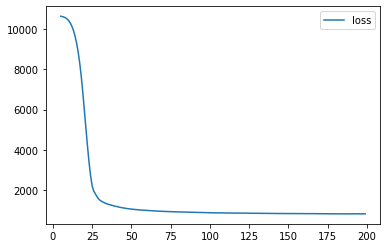

In [128]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot();

In [129]:
Results = train_and_evaluate(model, X_train, X_validation,\
                       y_train, y_validation, {}, "deep") 

On Validation/Test Set:
R2Score:  0.9078869221120417
root mean squre error:  1218.6143907853836
On Train Set:
R2Score:  0.8954034355499675
root mean squre error:  1155.7478087017805


In [130]:
X_train, X_test, y_train, y_test = \
    train.drop(columns=['Y', 'Feature 3']).values,\
    test.drop(columns=['Y', 'Feature 3']).values,\
    train['Y'].values, test['Y'].values

# X_train, X_test, y_train, y_test = \
#     train.drop(columns=['Y', 'Feature 3', 'Feature 2', 'Feature 9']).values,\
#     test.drop(columns=['Y', 'Feature 3', 'Feature 2', 'Feature 9']).values,\
#     train['Y'].values, test['Y'].values

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
history = model.fit(
    X_train, y_train,
    # validation_data=(X_test, y_test),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
9/9 [==============================] - 0s 2ms/step - loss: 842.0370
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 839.9822
Epoch 3/200
9/9 [==============================] - 0s 0s/step - loss: 838.0965
Epoch 4/200
9/9 [==============================] - 0s 0s/step - loss: 837.5247
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 834.9516
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 836.0648
Epoch 7/200
9/9 [==============================] - 0s 0s/step - loss: 836.1090
Epoch 8/200
9/9 [==========

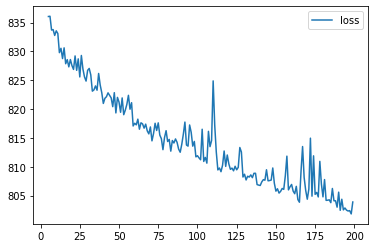

In [132]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

In [133]:
# model.evaluate(X_test, y_test, batch_size=128)

In [134]:
Results = train_and_evaluate(model, X_train, X_test,\
                       y_train, y_test, {}, "deep")

On Validation/Test Set:
R2Score:  0.8266890378176035
root mean squre error:  1417.0224929437147
On Train Set:
R2Score:  0.9046163092217567
root mean squre error:  1141.217799492041
